## Libs

In [1]:
import matplotlib as matpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping

# advanced plotting
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

Using TensorFlow backend.


## Data

In [2]:
%store -r data_SHY
data_SHY.head(2)

,Adj Close
Date,
2009-06-01,75.464882
2009-06-08,75.637337


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a37ea20>],
      dtype=object)

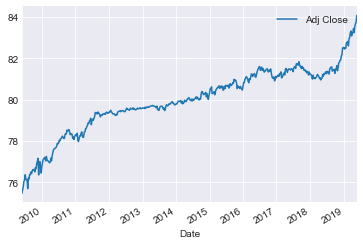

In [3]:
data_SHY.plot(subplots=True)

In [4]:
mm = MinMaxScaler(feature_range = (0,1))

In [5]:
dataset = mm.fit_transform(data_SHY)

In [6]:
#visualize a dataset[0:2]few data
dataset[0:2]

array([[0.        ],
       [0.02000304]])

1 data every week. 52 data per year, 522 data in total.
* use the past 2 months (8 weeks) to predict 1 week ahead.
* create window of last 8 obs to train model
Parameters:
* history_size - size of past window
* target_size - how far in future model should learn to predict

6 years of training data = 313 weeks. 
Rest of the 209 weeks are for validation.

In [7]:
split = 0.6

train_size = int(len(dataset) * split)
#validation
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

print("training, test set: " + str((len(train), len(test))))

training, test set: (313, 209)


In [8]:
def input_dataset(dataset, window):
    data_X, data_y = [], []
    for i in range(len(dataset) - window - 1):
        a = dataset[i:(i + window), 0]
        data_X.append(a)
        data_y.append(dataset[i + window, 0])
    return(np.array(data_X), np.array(data_y))


In [9]:
# New testing and training sets for rolling forecast.
window = 1
train_X, train_Y = input_dataset(train, window)
test_X, test_Y = input_dataset(test, window)
print("Original train shape:")
print(train_X.shape)

# Reshape input data to match Keras format.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New train shape:")
print(train_X.shape)

Original train shape:
(311, 1)
New train shape:
(311, 1, 1)


## Univar Forecasting Model
* Part 1 - model will be given the last 4 obs and needs to learn to predict price in the next time step.

In [14]:
def fit_LSTM(train_X, train_Y, window = 1, neurons=128):
    set_random_seed(3)
    model = Sequential()
    
    model.add(LSTM(neurons, 
                   input_shape = (1, window)
                  ))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    earlyStop=EarlyStopping(monitor="val_loss",verbose=2,patience=15)
    model.fit(train_X, 
              train_Y, 
              epochs = 2000, 
              batch_size = 25,
              shuffle = False
             # verbose = 2
             )
    
    return(model)

# Fit the first model.
model1 = fit_LSTM(train_X, train_Y, window)

Epoch 1/3000
311/311 [==============================] - 3s 10ms/step - loss: 0.1849
Epoch 2/3000
311/311 [==============================] - 0s 70us/step - loss: 0.1739
Epoch 3/3000
311/311 [==============================] - 0s 71us/step - loss: 0.1633
Epoch 4/3000
311/311 [==============================] - 0s 68us/step - loss: 0.1531
Epoch 5/3000
311/311 [==============================] - 0s 71us/step - loss: 0.1432
Epoch 6/3000
311/311 [==============================] - 0s 70us/step - loss: 0.1336
Epoch 7/3000
311/311 [==============================] - 0s 77us/step - loss: 0.1243
Epoch 8/3000
311/311 [==============================] - 0s 72us/step - loss: 0.1153
Epoch 9/3000
311/311 [==============================] - 0s 70us/step - loss: 0.1066
Epoch 10/3000
311/311 [==============================] - 0s 75us/step - loss: 0.0982
Epoch 11/3000
311/311 [==============================] - 0s 72us/step - loss: 0.0902
Epoch 12/3000
311/311 [==============================] - 0s 72us/step - lo

311/311 [==============================] - 0s 79us/step - loss: 0.0039
Epoch 193/3000
311/311 [==============================] - 0s 80us/step - loss: 0.0039
Epoch 194/3000
311/311 [==============================] - 0s 78us/step - loss: 0.0039
Epoch 195/3000
311/311 [==============================] - 0s 75us/step - loss: 0.0038
Epoch 196/3000
311/311 [==============================] - 0s 74us/step - loss: 0.0038
Epoch 197/3000
311/311 [==============================] - 0s 73us/step - loss: 0.0038
Epoch 198/3000
311/311 [==============================] - 0s 74us/step - loss: 0.0037
Epoch 199/3000
311/311 [==============================] - 0s 70us/step - loss: 0.0037
Epoch 200/3000
311/311 [==============================] - 0s 76us/step - loss: 0.0037
Epoch 201/3000
311/311 [==============================] - 0s 78us/step - loss: 0.0036
Epoch 202/3000
311/311 [==============================] - 0s 86us/step - loss: 0.0036
Epoch 203/3000
311/311 [==============================] - 0s 81us/ste

311/311 [==============================] - 0s 82us/step - loss: 3.4639e-04
Epoch 380/3000
311/311 [==============================] - 0s 76us/step - loss: 3.4202e-04
Epoch 381/3000
311/311 [==============================] - 0s 73us/step - loss: 3.3775e-04
Epoch 382/3000
311/311 [==============================] - 0s 74us/step - loss: 3.3358e-04
Epoch 383/3000
311/311 [==============================] - 0s 74us/step - loss: 3.2950e-04
Epoch 384/3000
311/311 [==============================] - 0s 72us/step - loss: 3.2552e-04
Epoch 385/3000
311/311 [==============================] - 0s 74us/step - loss: 3.2163e-04
Epoch 386/3000
311/311 [==============================] - 0s 75us/step - loss: 3.1783e-04
Epoch 387/3000
311/311 [==============================] - 0s 74us/step - loss: 3.1411e-04
Epoch 388/3000
311/311 [==============================] - 0s 78us/step - loss: 3.1049e-04
Epoch 389/3000
311/311 [==============================] - 0s 74us/step - loss: 3.0694e-04
Epoch 390/3000
311/311 [=

311/311 [==============================] - 0s 79us/step - loss: 1.8316e-04
Epoch 561/3000
311/311 [==============================] - 0s 73us/step - loss: 1.8315e-04
Epoch 562/3000
311/311 [==============================] - 0s 72us/step - loss: 1.8313e-04
Epoch 563/3000
311/311 [==============================] - 0s 75us/step - loss: 1.8311e-04
Epoch 564/3000
311/311 [==============================] - 0s 75us/step - loss: 1.8310e-04
Epoch 565/3000
311/311 [==============================] - 0s 78us/step - loss: 1.8309e-04
Epoch 566/3000
311/311 [==============================] - 0s 81us/step - loss: 1.8307e-04
Epoch 567/3000
311/311 [==============================] - 0s 79us/step - loss: 1.8306e-04
Epoch 568/3000
311/311 [==============================] - 0s 79us/step - loss: 1.8304e-04
Epoch 569/3000
311/311 [==============================] - 0s 79us/step - loss: 1.8303e-04
Epoch 570/3000
311/311 [==============================] - 0s 78us/step - loss: 1.8302e-04
Epoch 571/3000
311/311 [=

311/311 [==============================] - 0s 75us/step - loss: 1.8237e-04
Epoch 743/3000
311/311 [==============================] - 0s 76us/step - loss: 1.8237e-04
Epoch 744/3000
311/311 [==============================] - 0s 75us/step - loss: 1.8236e-04
Epoch 745/3000
311/311 [==============================] - 0s 78us/step - loss: 1.8236e-04
Epoch 746/3000
311/311 [==============================] - 0s 76us/step - loss: 1.8236e-04
Epoch 747/3000
311/311 [==============================] - 0s 71us/step - loss: 1.8236e-04
Epoch 748/3000
311/311 [==============================] - 0s 73us/step - loss: 1.8236e-04
Epoch 749/3000
311/311 [==============================] - 0s 76us/step - loss: 1.8235e-04
Epoch 750/3000
311/311 [==============================] - 0s 79us/step - loss: 1.8235e-04
Epoch 751/3000
311/311 [==============================] - 0s 74us/step - loss: 1.8235e-04
Epoch 752/3000
311/311 [==============================] - 0s 74us/step - loss: 1.8235e-04
Epoch 753/3000
311/311 [=

311/311 [==============================] - 0s 87us/step - loss: 1.8201e-04
Epoch 925/3000
311/311 [==============================] - 0s 82us/step - loss: 1.8200e-04
Epoch 926/3000
311/311 [==============================] - 0s 89us/step - loss: 1.8200e-04
Epoch 927/3000
311/311 [==============================] - 0s 91us/step - loss: 1.8200e-04
Epoch 928/3000
311/311 [==============================] - 0s 82us/step - loss: 1.8200e-04
Epoch 929/3000
311/311 [==============================] - 0s 88us/step - loss: 1.8200e-04
Epoch 930/3000
311/311 [==============================] - 0s 90us/step - loss: 1.8199e-04
Epoch 931/3000
311/311 [==============================] - 0s 84us/step - loss: 1.8199e-04
Epoch 932/3000
311/311 [==============================] - 0s 83us/step - loss: 1.8199e-04
Epoch 933/3000
311/311 [==============================] - 0s 83us/step - loss: 1.8199e-04
Epoch 934/3000
311/311 [==============================] - 0s 88us/step - loss: 1.8199e-04
Epoch 935/3000
311/311 [=

311/311 [==============================] - 0s 86us/step - loss: 1.8181e-04
Epoch 1016/3000
311/311 [==============================] - 0s 85us/step - loss: 1.8181e-04
Epoch 1017/3000
311/311 [==============================] - 0s 79us/step - loss: 1.8181e-04
Epoch 1018/3000
311/311 [==============================] - 0s 80us/step - loss: 1.8181e-04
Epoch 1019/3000
311/311 [==============================] - 0s 82us/step - loss: 1.8180e-04
Epoch 1020/3000
311/311 [==============================] - 0s 85us/step - loss: 1.8180e-04
Epoch 1021/3000
311/311 [==============================] - 0s 89us/step - loss: 1.8180e-04
Epoch 1022/3000
311/311 [==============================] - 0s 83us/step - loss: 1.8180e-04
Epoch 1023/3000
311/311 [==============================] - 0s 83us/step - loss: 1.8180e-04
Epoch 1024/3000
311/311 [==============================] - 0s 84us/step - loss: 1.8179e-04
Epoch 1025/3000
311/311 [==============================] - 0s 86us/step - loss: 1.8179e-04
Epoch 1026/3000

311/311 [==============================] - 0s 65us/step - loss: 1.8141e-04
Epoch 1196/3000
311/311 [==============================] - 0s 62us/step - loss: 1.8141e-04
Epoch 1197/3000
311/311 [==============================] - 0s 62us/step - loss: 1.8141e-04
Epoch 1198/3000
311/311 [==============================] - 0s 67us/step - loss: 1.8140e-04
Epoch 1199/3000
311/311 [==============================] - 0s 62us/step - loss: 1.8140e-04
Epoch 1200/3000
311/311 [==============================] - 0s 66us/step - loss: 1.8140e-04
Epoch 1201/3000
311/311 [==============================] - 0s 64us/step - loss: 1.8140e-04
Epoch 1202/3000
311/311 [==============================] - 0s 65us/step - loss: 1.8139e-04
Epoch 1203/3000
311/311 [==============================] - 0s 65us/step - loss: 1.8139e-04
Epoch 1204/3000
311/311 [==============================] - 0s 65us/step - loss: 1.8139e-04
Epoch 1205/3000
311/311 [==============================] - 0s 64us/step - loss: 1.8139e-04
Epoch 1206/3000

311/311 [==============================] - 0s 55us/step - loss: 1.8099e-04
Epoch 1376/3000
311/311 [==============================] - 0s 57us/step - loss: 1.8099e-04
Epoch 1377/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8099e-04
Epoch 1378/3000
311/311 [==============================] - 0s 55us/step - loss: 1.8098e-04
Epoch 1379/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8098e-04
Epoch 1380/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8098e-04
Epoch 1381/3000
311/311 [==============================] - 0s 56us/step - loss: 1.8098e-04
Epoch 1382/3000
311/311 [==============================] - 0s 56us/step - loss: 1.8097e-04
Epoch 1383/3000
311/311 [==============================] - 0s 57us/step - loss: 1.8097e-04
Epoch 1384/3000
311/311 [==============================] - 0s 58us/step - loss: 1.8097e-04
Epoch 1385/3000
311/311 [==============================] - 0s 59us/step - loss: 1.8097e-04
Epoch 1386/3000

311/311 [==============================] - 0s 55us/step - loss: 1.8057e-04
Epoch 1556/3000
311/311 [==============================] - 0s 55us/step - loss: 1.8057e-04
Epoch 1557/3000
311/311 [==============================] - 0s 57us/step - loss: 1.8057e-04
Epoch 1558/3000
311/311 [==============================] - 0s 53us/step - loss: 1.8056e-04
Epoch 1559/3000
311/311 [==============================] - 0s 56us/step - loss: 1.8056e-04
Epoch 1560/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8056e-04
Epoch 1561/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8056e-04
Epoch 1562/3000
311/311 [==============================] - 0s 56us/step - loss: 1.8055e-04
Epoch 1563/3000
311/311 [==============================] - 0s 58us/step - loss: 1.8055e-04
Epoch 1564/3000
311/311 [==============================] - 0s 61us/step - loss: 1.8055e-04
Epoch 1565/3000
311/311 [==============================] - 0s 60us/step - loss: 1.8055e-04
Epoch 1566/3000

311/311 [==============================] - 0s 54us/step - loss: 1.8016e-04
Epoch 1735/3000
311/311 [==============================] - 0s 52us/step - loss: 1.8016e-04
Epoch 1736/3000
311/311 [==============================] - 0s 52us/step - loss: 1.8016e-04
Epoch 1737/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8016e-04
Epoch 1738/3000
311/311 [==============================] - 0s 54us/step - loss: 1.8016e-04
Epoch 1739/3000
311/311 [==============================] - 0s 53us/step - loss: 1.8015e-04
Epoch 1740/3000
311/311 [==============================] - 0s 56us/step - loss: 1.8015e-04
Epoch 1741/3000
311/311 [==============================] - 0s 52us/step - loss: 1.8015e-04
Epoch 1742/3000
311/311 [==============================] - 0s 52us/step - loss: 1.8015e-04
Epoch 1743/3000
311/311 [==============================] - 0s 55us/step - loss: 1.8014e-04
Epoch 1744/3000
311/311 [==============================] - 0s 56us/step - loss: 1.8014e-04
Epoch 1745/3000

311/311 [==============================] - 0s 60us/step - loss: 1.7979e-04
Epoch 1915/3000
311/311 [==============================] - 0s 58us/step - loss: 1.7979e-04
Epoch 1916/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7978e-04
Epoch 1917/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7978e-04
Epoch 1918/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7978e-04
Epoch 1919/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7978e-04
Epoch 1920/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7978e-04
Epoch 1921/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7977e-04
Epoch 1922/3000
311/311 [==============================] - 0s 56us/step - loss: 1.7977e-04
Epoch 1923/3000
311/311 [==============================] - 0s 59us/step - loss: 1.7977e-04
Epoch 1924/3000
311/311 [==============================] - 0s 61us/step - loss: 1.7977e-04
Epoch 1925/3000

311/311 [==============================] - 0s 63us/step - loss: 1.7946e-04
Epoch 2095/3000
311/311 [==============================] - 0s 64us/step - loss: 1.7946e-04
Epoch 2096/3000
311/311 [==============================] - 0s 66us/step - loss: 1.7946e-04
Epoch 2097/3000
311/311 [==============================] - 0s 66us/step - loss: 1.7946e-04
Epoch 2098/3000
311/311 [==============================] - 0s 65us/step - loss: 1.7946e-04
Epoch 2099/3000
311/311 [==============================] - 0s 63us/step - loss: 1.7945e-04
Epoch 2100/3000
311/311 [==============================] - 0s 64us/step - loss: 1.7945e-04
Epoch 2101/3000
311/311 [==============================] - 0s 69us/step - loss: 1.7945e-04
Epoch 2102/3000
311/311 [==============================] - 0s 65us/step - loss: 1.7945e-04
Epoch 2103/3000
311/311 [==============================] - 0s 64us/step - loss: 1.7945e-04
Epoch 2104/3000
311/311 [==============================] - 0s 64us/step - loss: 1.7945e-04
Epoch 2105/3000

311/311 [==============================] - 0s 55us/step - loss: 1.7921e-04
Epoch 2275/3000
311/311 [==============================] - 0s 56us/step - loss: 1.7920e-04
Epoch 2276/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7920e-04
Epoch 2277/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7920e-04
Epoch 2278/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7920e-04
Epoch 2279/3000
311/311 [==============================] - 0s 52us/step - loss: 1.7920e-04
Epoch 2280/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7920e-04
Epoch 2281/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7920e-04
Epoch 2282/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7920e-04
Epoch 2283/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7920e-04
Epoch 2284/3000
311/311 [==============================] - 0s 52us/step - loss: 1.7919e-04
Epoch 2285/3000

311/311 [==============================] - 0s 52us/step - loss: 1.7904e-04
Epoch 2455/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7904e-04
Epoch 2456/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7903e-04
Epoch 2457/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7903e-04
Epoch 2458/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7903e-04
Epoch 2459/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7903e-04
Epoch 2460/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7903e-04
Epoch 2461/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7903e-04
Epoch 2462/3000
311/311 [==============================] - 0s 52us/step - loss: 1.7903e-04
Epoch 2463/3000
311/311 [==============================] - 0s 51us/step - loss: 1.7903e-04
Epoch 2464/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7903e-04
Epoch 2465/3000

311/311 [==============================] - 0s 55us/step - loss: 1.7896e-04
Epoch 2635/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7896e-04
Epoch 2636/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7896e-04
Epoch 2637/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7896e-04
Epoch 2638/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7896e-04
Epoch 2639/3000
311/311 [==============================] - 0s 56us/step - loss: 1.7896e-04
Epoch 2640/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7896e-04
Epoch 2641/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7896e-04
Epoch 2642/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7896e-04
Epoch 2643/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7896e-04
Epoch 2644/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7896e-04
Epoch 2645/3000

311/311 [==============================] - 0s 54us/step - loss: 1.7898e-04
Epoch 2815/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7898e-04
Epoch 2816/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7898e-04
Epoch 2817/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7898e-04
Epoch 2818/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7898e-04
Epoch 2819/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7898e-04
Epoch 2820/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7898e-04
Epoch 2821/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7898e-04
Epoch 2822/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7898e-04
Epoch 2823/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7898e-04
Epoch 2824/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7898e-04
Epoch 2825/3000

311/311 [==============================] - 0s 54us/step - loss: 1.7905e-04
Epoch 2994/3000
311/311 [==============================] - 0s 55us/step - loss: 1.7906e-04
Epoch 2995/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7906e-04
Epoch 2996/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7906e-04
Epoch 2997/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7906e-04
Epoch 2998/3000
311/311 [==============================] - 0s 53us/step - loss: 1.7906e-04
Epoch 2999/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7906e-04
Epoch 3000/3000
311/311 [==============================] - 0s 54us/step - loss: 1.7906e-04


## Results 
### Predictions and model evaluations
The advantage of using the RMSE is that it's in the same unit as the original data, i.e. price/wk (1.000 passengers / month in Kaggle example).

In [15]:
def prediction_score(model, X, Y):
    # Make predictions using input data
    pred = mm.inverse_transform(model.predict(X))
    # Show Y on original scale
    original_data = mm.inverse_transform([Y])
    # RMSE.
    score = math.sqrt(mean_squared_error(original_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_pred = prediction_score(model1, train_X, train_Y)
rmse_test, test_pred = prediction_score(model1, test_X, test_Y)

print("Training score: %.2f RMSE" % rmse_train)
print("Testing score: %.2f RMSE" % rmse_test)

Training score: 0.12 RMSE
Testing score: 0.12 RMSE


### Plotting and comparing original data, predictions, forecasts

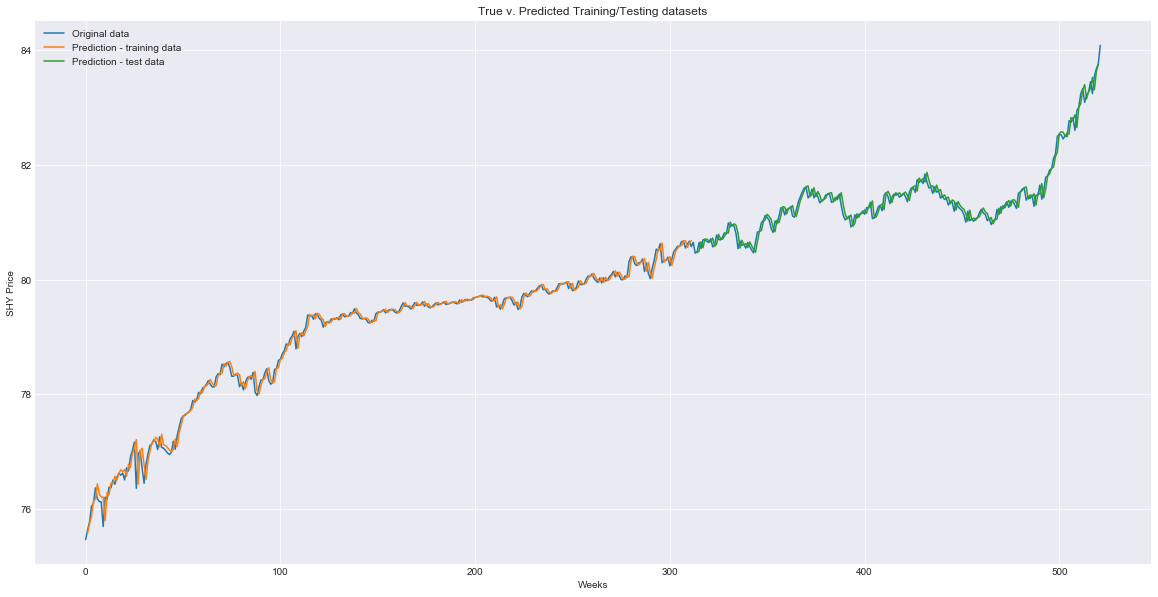

In [16]:
# Train predictions
train_pred_plot = np.empty_like(dataset)
train_pred_plot[:, :] = np.nan
train_pred_plot[window:len(train_pred) + window, :] = train_pred

# Test predictions
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (window * 2) + 1:len(dataset) - 1, :] = test_pred

#plot
plt.figure(figsize = (20, 10))
plt.plot(mm.inverse_transform(dataset), label = 'Original data')
plt.plot(train_pred_plot, label = 'Prediction - training data')
plt.plot(test_pred_plot, label = 'Prediction - test data')
plt.xlabel('Weeks')
plt.ylabel('SHY Price')
plt.title('True v. Predicted Training/Testing datasets')
plt.legend()
plt.show()

In [17]:
LSTM_pred_SHY = pd.DataFrame(test_pred)
%store LSTM_pred_SHY

Stored 'LSTM_pred_SHY' (DataFrame)
